In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

#sys.path.insert(0,"/export/nfs0home/kleinca/fire_tools/FIRE_studio")

#sys.path.insert(0,"/export/nfs0home/kleinca/fire_tools/FIRE_studio")
#sys.path.append("/export/nfs0home/kleinca/my_tools/mockobservation_tools")
#sys.path.insert(0,"/export/nfs0home/kleinca/my_tools/mockobservation_tools")
#sys.path.insert(0,"/export/nfs0home/kleinca/fire_tools/FIRE_studio")

from mockobservation_tools.galaxy_tools import (load_halo,
                                                load_sim,
                                                mask_sim_to_halo,
                                                get_mock_observation,
                                                )

from mockobservation_tools.general_tools import mag_to_lum_SB


%matplotlib inline


Missing firefly, obtain it at http://github.com/ageller/Firefly or pip install firefly.


In [2]:
import firestudio
firestudio

<module 'firestudio' from '/export/nfs0home/kleinca/miniconda3/envs/apenv/lib/python3.12/site-packages/firestudio/__init__.py'>

In [3]:

import mockobservation_tools
mockobservation_tools

<module 'mockobservation_tools' from '/export/nfs0home/kleinca/miniconda3/envs/apenv/lib/python3.12/site-packages/mockobservation_tools/__init__.py'>

In [4]:
import firestudio
firestudio

<module 'firestudio' from '/export/nfs0home/kleinca/miniconda3/envs/apenv/lib/python3.12/site-packages/firestudio/__init__.py'>

### Part One

#### Make a Science Image

Make a science image using FIRE Zooms

Make a science image using FIREbox


### Part Two

#### Make a Composite Image

This is 



# Science Images

### Load FIRE zooms

The expected input files are the raw simulation file and the halo file 

This load takes the simulation, centers on the halo, and crops within a given field of view



In [5]:
sim = 'm11c_res2100'

snap_num = 600

# path to the directory holding the simulation snapshot 
sim_path =  '/DFS-L/DATA/cosmo/grenache/aalazar/FIRE/GVB/'+str(sim)+'/output/hdf5/snapdir_'+str(snap_num)+'/'

# path to the directory holding the halo files for the simulation
halo_path = '/DFS-L/DATA/cosmo/grenache/aalazar/FIRE/GVB/'+str(sim)+'/halo/rockstar_dm/hdf5/'


In [6]:
sim_path

'/DFS-L/DATA/cosmo/grenache/aalazar/FIRE/GVB/m11c_res2100/output/hdf5/snapdir_600/'

In [7]:
# This loads the halo file
# host=True means it only returns the host halo information, otherwise it returns all the halos
# filetype='hdf5' indicate the halo file type, some halos are filetype='ascii'
# hostnumber indicates which host halo you are looking at. Only need to worry about this for the elvis pairs.
        #use hostnumber=2 to get the halo info for the second host halo. 
        #ex: halo_themla = load_halo(halo_path, snap_num, host=True, filetype='hdf5', hostnumber=1)
        #    halo_louise = load_halo(halo_path, snap_num, host=True, filetype='hdf5', hostnumber=2)


halo = load_halo(halo_path, snap_num, host=True, filetype='hdf5', hostnumber=1)


In [8]:
halo

,id,x,y,z,mvir,Halfmass_Radius,mbound_vir,rvir
5842,42272,27432.992188,26996.224609,26721.226562,1.354786e+11,167.38176,1.461396e+11,167.38176


In [9]:
# This loads the star and gas particle
# It only loads the parameters I need for the mock images

star_snapdict, gas_snapdict = load_sim(sim_path,snap_num)


In [9]:
star_snapdict

{'h': np.float64(0.702),
 'a': np.float64(0.9999999999999998),
 'Coordinates': array([[27701.09586576, 27384.22364126, 26673.63419778],
        [27702.05692795, 27422.67087557, 26657.46354832],
        [27700.36119734, 27414.91647291, 26693.18142945],
        ...,
        [30364.8796694 , 24473.10952785, 27265.48734983],
        [30365.71033865, 24473.64122021, 27265.32760373],
        [30373.29522648, 24473.53904816, 27279.48267476]]),
 'Velocities': array([[ -25.0974102 , -100.76411438,  -83.91740417],
        [ -13.32144737,  -77.31069183,  -33.60589218],
        [   9.7593317 , -107.96266174,  -51.40874863],
        ...,
        [  16.40116882, -162.43916321, -272.87780762],
        [ 103.07076263, -183.82739258, -289.02639771],
        [  53.56354523, -176.84831238, -272.097229  ]]),
 'Masses': array([1421.11840751, 1485.89479278, 1336.87850213, ..., 1390.72681221,
        1425.45312083, 1354.28969337]),
 'Metallicity': array([0.00028356, 0.00243344, 0.00153257, ..., 0.0015911 , 0

In [11]:
#from importlib import reload
#reload(mockobservation_tools)

<module 'mockobservation_tools' from '/export/nfs0home/kleinca/miniconda3/envs/apenv/lib/python3.12/site-packages/mockobservation_tools/__init__.py'>

In [10]:
# This centers star and gas dictionaries on the host halo
# If orient=True, then it will rotate the particles based on the disk orientation
# If lim=True, then it masks out the particles beyond the limvalue
    # Have lim=False if you want to carry around all the particles
    # I chose to mask out particles beyond the virial radius
    

limvalue = halo['rvir'].values[0] * 0.05

star_snapdict, gas_snapdict, halo = mask_sim_to_halo(star_snapdict=star_snapdict,
                                                         gas_snapdict=gas_snapdict, 
                                                         host_halo=halo, 
                                                         orient=False,
                                                         lim = True,
                                                         limvalue = limvalue
                                                        )


AttributeError: /nfspool-0/home/kleinca/miniconda3/envs/apenv/lib/python3.12/site-packages/firestudio/utils/C_routines/StellarHsml/starhsml.so

In [10]:
# This centers star and gas dictionaries on the host halo
# If orient=True, then it will rotate the particles based on the disk orientation
# If lim=True, then it masks out the particles beyond the limvalue
    # Have lim=False if you want to carry around all the particles
    # I chose to mask out particles beyond the virial radius
    

limvalue = halo['rvir'].values[0] * 0.05

star_snapdict, gas_snapdict, halo = mask_sim_to_halo(star_snapdict=star_snapdict,
                                                         gas_snapdict=gas_snapdict, 
                                                         host_halo=halo, 
                                                         orient=False,
                                                         lim = True,
                                                         limvalue = limvalue
                                                        )


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
pixel = 1000
FOV = limvalue
view = 'xy'

band_image = get_mock_observation(star_snapdict,gas_snapdict,
                                          FOV=FOV, 
                                          return_type='mock_image',
                                          pixels=pixel, 
                                          view=view,
                                          minden=1, 
                                          dynrange=1e10,
                                          center='none')

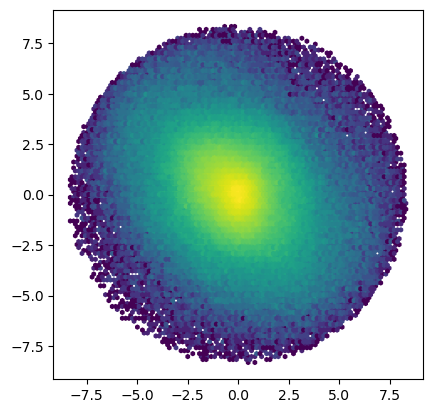

In [11]:
plt.hexbin(star_snapdict['Coordinates'][:,0],star_snapdict['Coordinates'][:,1], bins='log')
plt.gca().set_aspect(1)

In [19]:
from firestudio.utils.stellar_utils.load_stellar_hsml import get_particle_hsml


In [20]:
get_particle_hsml

In [21]:
firestudio?

In [ ]:
def read_band_lums_from_tables(
    BAND_IDS, 
    stellar_mass,stellar_age,stellar_metallicity,
    ## flag to return luminosity in each band requested without projecting
    nu_effs=None,
    lums=None,
    QUIET=False,
    IMF_CHABRIER=1,
    IMF_SALPETER=0):
        
    if nu_effs is None:
        nu_effs = [None,None,None]

    ## count particles we're using
    Nstars=len(np.array(stellar_mass))

    ## count how many bands we're attenuating
    Nbands=len(np.array(BAND_IDS))

    ## require that we attenuate 3 bands to combine since attenuation
    ##  routine is hardcoded to accept 3 weights
    if (Nbands != 3): 
        print("stellar_raytrace needs 3 bands, you gave",Nbands)
        return -1,-1,-1;

    ## check if stellar metallicity is a matrix
    ##  i.e. mass fraction of many species. If so,
    ##  take the total metallicity 
    if (len(stellar_metallicity.shape)>1): 
        stellar_metallicity=stellar_metallicity[:,0];

    ## get opacities and luminosities at frequencies we need:
    kappa=np.zeros([Nbands])
    if lums is None:
        lums=np.zeros([Nbands,Nstars])
    else:
        ## verify shape of lums is correct
        if lums.shape != (Nbands,Nstars):
            raise ValueError(
                "Shape (%d,%d) of lums does not match (3,%d)"%(
                lums.shape[0],lums.shape[1],Nstars))

    for i_band in range(Nbands):
        if nu_effs[i_band] is None:
            if not np.all(lums[i_band]==0):
                raise ValueError(
                    "Non-zero lums passed in axis %d"%i_band+
                    " without corresponding nu_eff")
            ## find the frequency associated with this band
            nu_effs[i_band] = colors_table(
                np.array([1.0]), ## dummy value
                np.array([1.0]), ## dummy value
                BAND_ID=BAND_IDS[i_band], ## band index
                RETURN_NU_EFF=1,
                QUIET=True) ## flag to return effective NU in this band


        ## calculate the kappa in this band using:
        ##  Thompson scattering + 
        ##  Pei (1992) + -- 304 < lambda[Angstroms] < 2e7
        ##  Morrison & McCammon (1983) -- 1.2 < lambda[Angstroms] < 413
        #kappa[i_band] = opacity_per_solar_metallicity(
        #    nu_effs[i_band])

        these_lums = lums[i_band]
        ## if lums were not passed in for this band
        if np.all( these_lums == 0):
            ## lookup the luminosity/mass in this band
            ##  given stellar ages and metallicities
            these_lums[:] = colors_table(
                stellar_age, ## ages in Gyr
                stellar_metallicity/0.02,  ## metallicity in solar
                BAND_ID=BAND_IDS[i_band], ## band index
                CHABRIER_IMF=IMF_CHABRIER, ## imf flags
                SALPETER_IMF=IMF_SALPETER, ## imf flags
                CRUDE=1, ## map particles to nearest table entry rather than interpolate
                UNITS_SOLAR_IN_BAND=1, ## return ((L_star)_band / L_sun) / M_sun
                QUIET=QUIET
                ) 

        #these_lums[these_lums >= 300.] = 300. ## just to prevent crazy values here 
        #these_lums[these_lums <= 0.] = 0. ## just to prevent crazy values here 
        lums[i_band] = stellar_mass * these_lums 

    return lums #kappa,

In [ ]:
load_sim_FIREBox